In [1]:
library(zoo)
library(dplyr)
library(caret)
library(ggplot2)
library(pROC)
set.seed(23)


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: ggplot2
Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [2]:
herrings_raw_top <- read.csv(file='https://raw.githubusercontent.com/mateuszskiba/emd-1/master/sledzie.csv?token=AFU5A4AIIMA5QAADFMACAFS55ZYIY', header=TRUE, sep=',', na.strings='?', nrows=100)
classes <- sapply(herrings_raw_top, class)
herrings_raw <- read.csv(file='https://raw.githubusercontent.com/mateuszskiba/emd-1/master/sledzie.csv?token=AFU5A4AIIMA5QAADFMACAFS55ZYIY', header=TRUE, sep=',', na.strings='?', colClasses=classes)
herrings <- 
  herrings_raw %>%
  do(na.locf(.))

In [ ]:
herrings_raw[is.na(herrings_raw[,i]), i] <- mean(herrings_raw[,i], na.rm = TRUE)

In [16]:
head(herrings)

,X,length,cfin1,cfin2,chel1,chel2,lcop1,lcop2,fbar,recr,cumf,totaln,sst,sal,xmonth,nao
2,1,22.5,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
3,2,25.0,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
4,3,25.5,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
5,4,24.0,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
6,5,22.0,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
7,6,24.0,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8


In [3]:
idx <- createDataPartition(herrings$length, times=2, p=0.25, list=FALSE)
idxTest <- idx[,1]
idxVal <- idx[,2]

train <- herrings[-c(idxTest, idxVal),]
test <- herrings[idxTest,]
val <- herrings[idxVal,]

In [4]:
head(train)

,X,length,cfin1,cfin2,chel1,chel2,lcop1,lcop2,fbar,recr,cumf,totaln,sst,sal,xmonth,nao
3,2,25.0,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
7,6,24.0,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
8,7,23.5,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
9,8,22.5,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
11,10,23.0,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
12,11,22.5,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,6,2.8


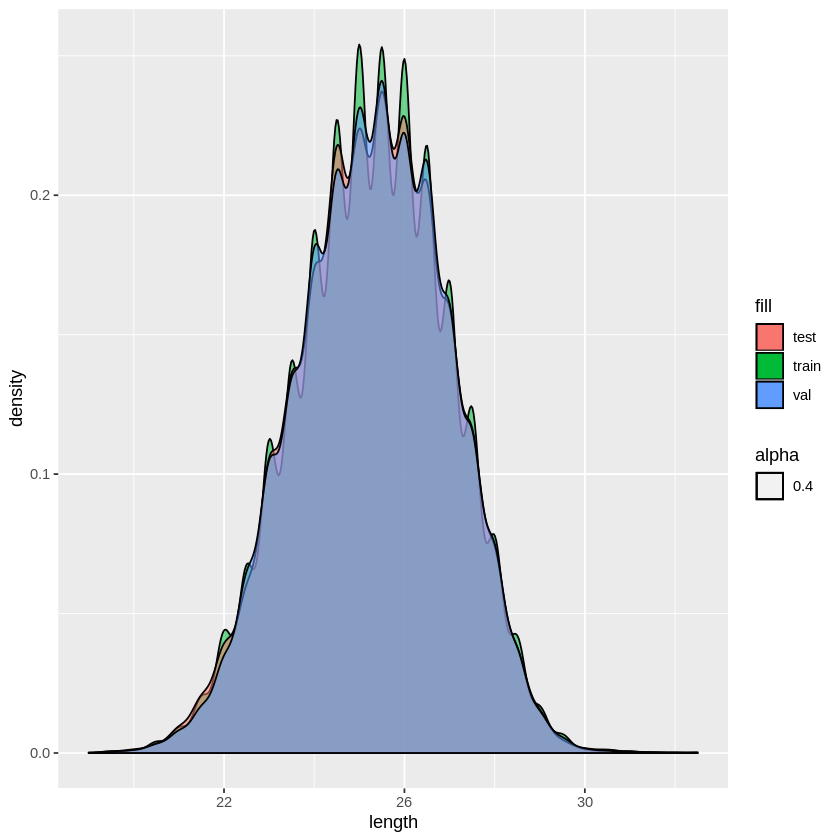

In [5]:
ggplot(mapping=aes(alpha=0.4)) + 
 geom_density(aes(length, fill="train"), train) + 
 geom_density(aes(length, fill="test"), test) + 
 geom_density(aes(length, fill="val"), val)

In [46]:
ctrl <- trainControl(
           method = "repeatedcv",
           number = 10,
           repeats = 10)

In [47]:
fit <- train(length ~ .,
             data = train,
             trControl = ctrl,
             method = "gbm")
# trControl = ctrl,

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        2.5907            -nan     0.1000    0.1358
     2        2.4817            -nan     0.1000    0.1102
     3        2.3918            -nan     0.1000    0.0892
     4        2.3212            -nan     0.1000    0.0720
     5        2.2581            -nan     0.1000    0.0622
     6        2.2057            -nan     0.1000    0.0527
     7        2.1587            -nan     0.1000    0.0469
     8        2.1172            -nan     0.1000    0.0399
     9        2.0802            -nan     0.1000    0.0367
    10        2.0499            -nan     0.1000    0.0297
    20        1.8475            -nan     0.1000    0.0143
    40        1.6768            -nan     0.1000    0.0049
    60        1.5909            -nan     0.1000    0.0035
    80        1.5418            -nan     0.1000    0.0020
   100        1.5122            -nan     0.1000    0.0009
   120        1.4900            -nan     0.1000    0.0009
   140        

In [48]:
fit

Stochastic Gradient Boosting 

29571 samples
   15 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 26612, 26614, 26614, 26615, 26616, 26613, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  RMSE      Rsquared   MAE      
  1                   50      1.279683  0.4199042  1.0173784
  1                  100      1.235335  0.4485820  0.9806830
  1                  150      1.217019  0.4624126  0.9654378
  2                   50      1.211730  0.4694205  0.9622529
  2                  100      1.182245  0.4912165  0.9372083
  2                  150      1.169838  0.5009320  0.9266862
  3                   50      1.184341  0.4908116  0.9390511
  3                  100      1.163038  0.5067491  0.9213914
  3                  150      1.153519  0.5143857  0.9128434

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 1

In [19]:
# ggplot(fit) + theme_bw()

In [49]:
regFloatLength <- predict(fit,
                      newdata = test)
head(regFloatLength)

[1] 23.21757 23.21757 23.21757 23.17349 23.17349 23.17349

In [21]:
# list(test$length)
#class(regClasses)
length(test$length)
length(regFloatLength)

[1] 13146

[1] 13146

In [51]:
regLength <- round(regFloatLength)
head(regLength)

[1] 23 23 23 23 23 23

In [57]:
min(regLength)
max(regLength)

[1] 22

[1] 28

In [58]:
confusionMatrix(data = factor(regLength, levels=min(regLength):max(regLength)),
                factor(test$length, levels=min(regLength):max(regLength)))

Confusion Matrix and Statistics

          Reference
Prediction  22  23  24  25  26  27  28
        22   1   5   1   1   0   0   0
        23 161 259 179  64  15   3   0
        24  68 205 240 154  62   7   0
        25  12 164 520 768 529 189  38
        26   6  39 130 369 621 458 175
        27   0   7  19  50 215 339 227
        28   0   0   1   3   6  15  27

Overall Statistics
                                          
               Accuracy : 0.355           
                 95% CI : (0.3432, 0.3669)
    No Information Rate : 0.228           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.1982          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 22 Class: 23 Class: 24 Class: 25 Class: 26
Sensitivity          0.0040323   0.38144   0.22018    0.5451   0.42887
Specificity          0.9988532   0.92561   0.90574    0.7063   

In [59]:
rsq <- function (x, y) cor(x, y) ^ 2

In [60]:
rsq(regFloatLength, test$length)

[1] 0.521016

In [61]:
rsq(regLength, test$length)

[1] 0.487461